# T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)" data-toc-modified-id="T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)-1">T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)</a></span></li><li><span><a href="#Set-Parameters" data-toc-modified-id="Set-Parameters-2">Set Parameters</a></span></li><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-3">Libraries Used</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-4">Read Data</a></span></li></ul></div>

# Set Parameters

In [16]:
# Directory where I store original data (copied form the Web, etc.)
original_data_directory = "D:\\Drive\\market_indicators\\original\\"

# Directory where we will save data we create
derived_data_directory = "D:\\Drive\\market_indicators\\original\\"

# The file we analyze in this notebook
file_name = "TPLGX.csv"

"TPLGX.csv"

# Libraries Used

In [17]:
using DataFrames, CSV, Dates, Plots

# Read Data

In [43]:
df = CSV.read(original_data_directory*file_name)
for i in [ names(df) ]
    println(1, " ", names(df)[1])
end

1 Date


In [28]:
original_date   = 1  #
original_actual   = 2  #
original_previous_value = 4  #

# Show the values of the column with the original data
show(df[end-5:end, # row to row
        [1, 3,4,7]] # column to column
    , allcols=true) # do NOT limit number of columns if more than 6

6×4 DataFrame
│ Row │ Date       │ High    │ Low     │ Volume │
│     │ Date       │ Float64 │ Float64 │ Int64  │
├─────┼────────────┼─────────┼─────────┼────────┤
│ 1   │ 2020-09-09 │ 60.55   │ 60.55   │ 0      │
│ 2   │ 2020-09-10 │ 59.34   │ 59.34   │ 0      │
│ 3   │ 2020-09-11 │ 58.94   │ 58.94   │ 0      │
│ 4   │ 2020-09-14 │ 59.68   │ 59.68   │ 0      │
│ 5   │ 2020-09-15 │ 60.35   │ 60.35   │ 0      │
│ 6   │ 2020-09-16 │ 59.61   │ 59.61   │ 0      │

In [36]:
size(df)

(4270, 7)

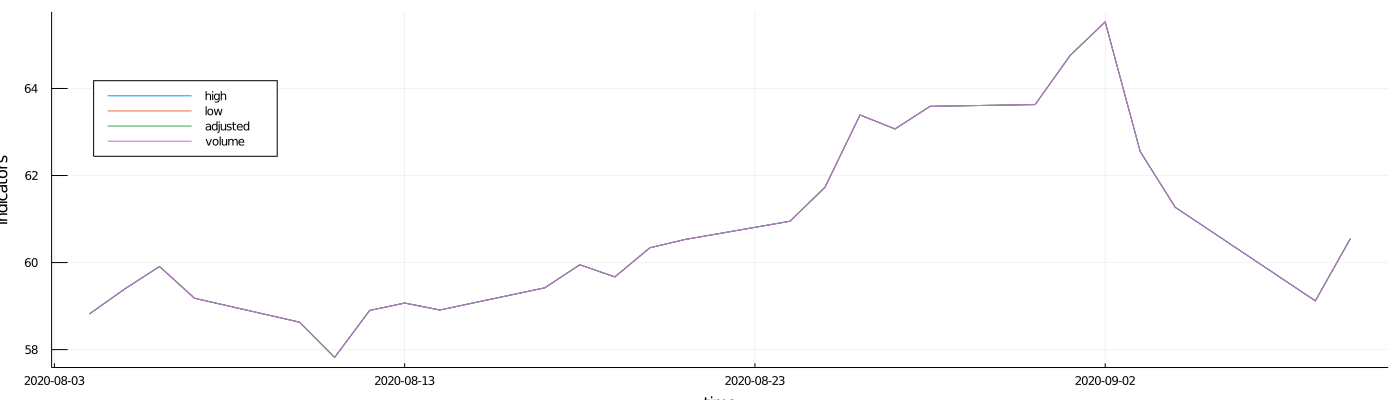

In [38]:
using Plots

rows = 4270-30:4270-5
gr()
plot(df[ rows,1 ], 
    [ df[rows,3] df[rows,4] df[rows,5] df[rows,6] ], 
    label    = ["high" "low" "adjusted" "volume"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 400), # width, height
    layout = (1, 1)
    )